In [1]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt     

from tensorflow import keras
from sklearn.preprocessing import StandardScaler 
import plotly.graph_objects as go

from sklearn.ensemble import IsolationForest  

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed 
import seaborn as sns #visualisation
from sklearn import metrics 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV  

In [3]:
# import data set from the local driver 
df=pd.read_csv('SWaT_Dataset_Attack_v0 - Copy.csv')#, parse_dates = ['Timestamp'], index_col = 'Timestamp')
df.head(2)   

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal


In [4]:
# drop the Acutotor colomuns 
#df1=df.drop(['Timestamp',' MV101','P101','P102', ' MV201', ' P201', ' P202','P203', ' P204','P205','P206','MV301','MV302',' MV303','MV304','P301','P302','P401','P402','P403','P404','UV401','P501','P502','P601','P602','P603'],axis=1)#, inplace=True)
# drop the Acutotor colomuns 
df1=df.drop(['Timestamp',' MV101','P101','P102', ' MV201', ' P201', ' P202','P203', ' P204','P205','P206','MV301','MV302',' MV303','MV304','P301','P302','P401','P402','P403','P404','UV401','P501','P502','P601','P602','P603'],axis=1)#, inplace=True)  

#### Exploratory Data Analysis   

##### 1. Checking the types of data  
- We check here to see if the sensor data in SWaT is stored as a string or an object, and if it is, we must convert that string to integer data before plotting the data on a graph. All of the sensor data attributes in our dataset are float and integer, as seen in the following visualization: 

In [5]:
# # Checking the data type
df1.dtypes   

FIT101           float64
LIT101           float64
 AIT201          float64
AIT202           float64
AIT203           float64
FIT201           float64
DPIT301          float64
FIT301           float64
LIT301           float64
AIT401           float64
AIT402           float64
FIT401           float64
LIT401           float64
AIT501           float64
AIT502           float64
AIT503           float64
AIT504           float64
FIT501           float64
FIT502           float64
FIT503           float64
FIT504           float64
PIT501           float64
PIT502           float64
PIT503           float64
FIT601           float64
Normal/Attack     object
dtype: object

#### 2 Histograms
- First, we'll make a set of frequency histograms for the features in our dataset (V1–V26). 

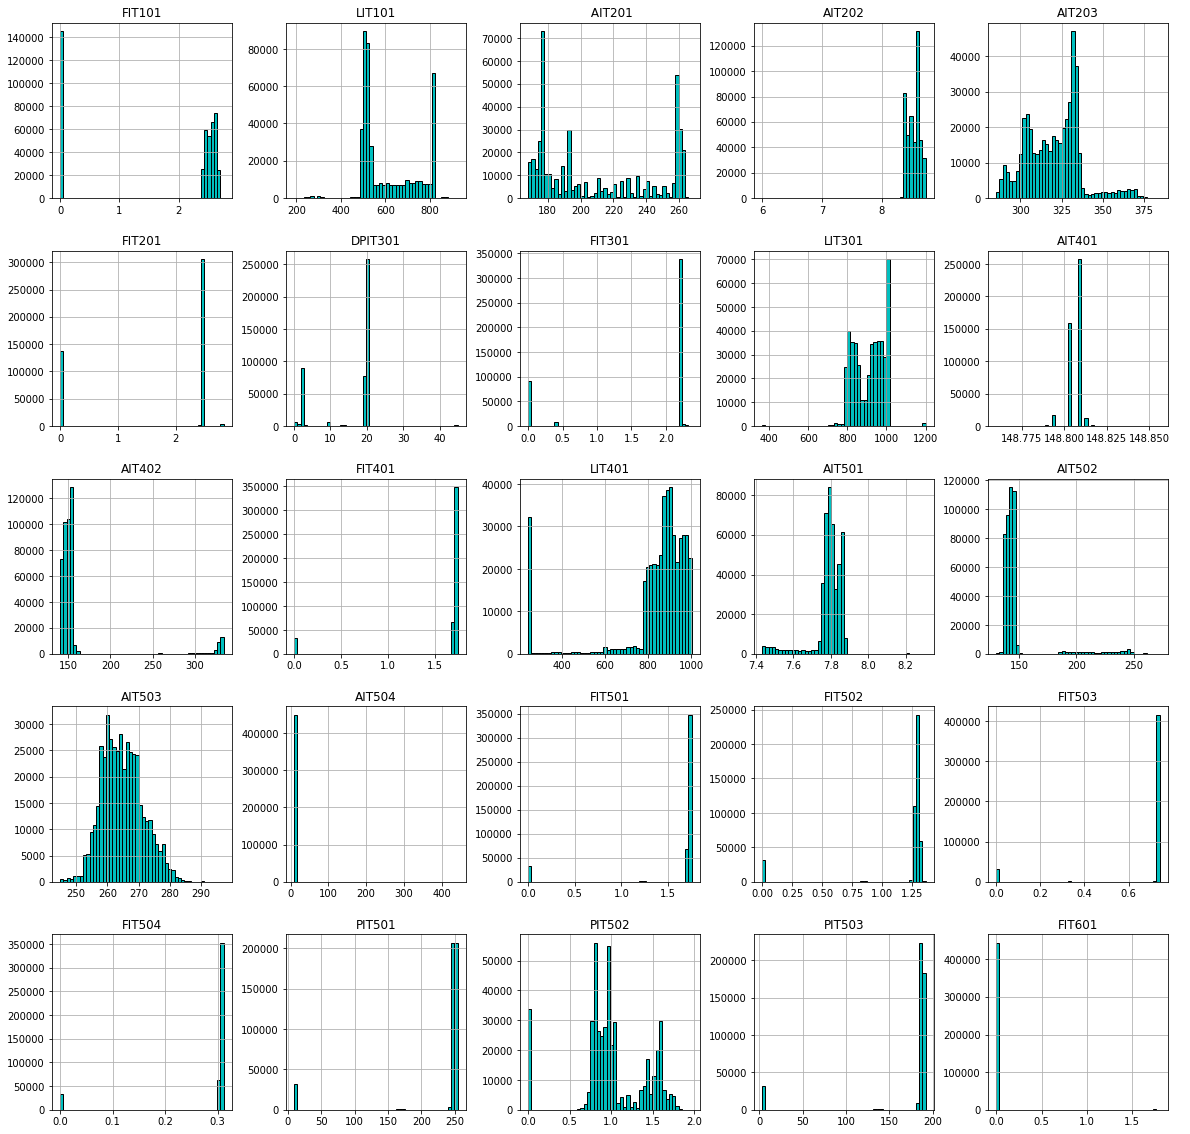

In [6]:
# create histograms on all features

df1.hist(figsize=(20,20), bins = 50, color = "c", edgecolor='black')
plt.show()   

#### 3. Dropping irrelevant columns

In [7]:
#If there are missing entries, drop them.
df1.dropna(inplace=True)#,axis=1)   

In [8]:
# Total number of rows and columns 
df1.shape  

(449919, 26)

In [9]:
# Rows containing duplicate data
duplicate_rows_df = df1[df1.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (8121, 26)


In [10]:
# Dropping the duplicates 
df1= df1.drop_duplicates()
df1.head(2)   

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,Normal/Attack
0,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.808,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
1,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.808,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal


In [11]:
# Counting the number of rows after removing duplicates.
df1.shape 

(441798, 26)

<AxesSubplot:>

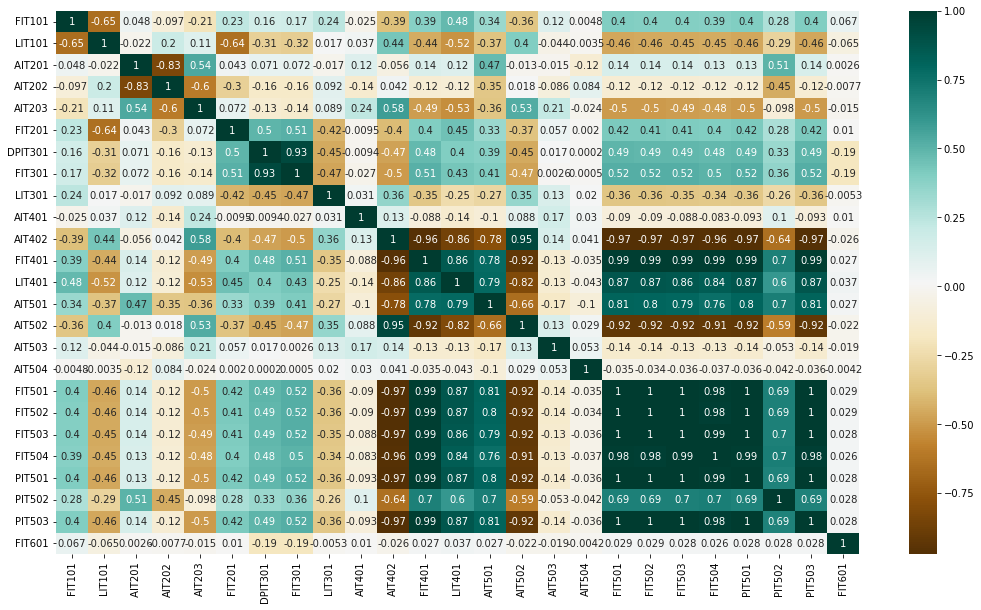

In [13]:
# Finding the relations between the variables.
plt.figure(figsize=(18,10))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
#c  

In [16]:
df1['Normal/Attack'] = df1['Normal/Attack'].str.replace(' ', '')   

In [17]:
#To see how the data is spread betwen Good and Bad
print(df1.groupby('Normal/Attack')['Normal/Attack'].count()) 

Normal/Attack
Attack     53648
Normal    388150
Name: Normal/Attack, dtype: int64


In [18]:
# Rename the col name Normal/Attack with A  
df1.rename(columns = {'Normal/Attack':'A'}, inplace = True)
df1.head(2) 

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.808,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,Normal
1,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.808,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,Normal


- As we can see,The data set is highly imbalanced. While this would be a challenge for typical classification systems, it is a natural application for outlier identification algorithms such as the Auto Encoder .

size of class 1 (outliers): 0, size of class 0: 0


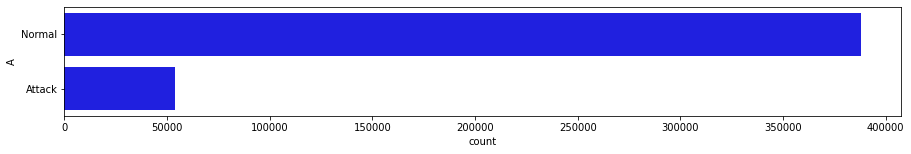

In [19]:
# Plot the balance of class labels
df_base = df1.copy()
nominal_count = len(df_base.loc[df1['A'] == 0, 'A'])
outlier_count = len(df_base.loc[df1['A'] == 1, 'A'])
print(f'size of class 1 (outliers): {outlier_count}, size of class 0: {nominal_count}')

plt.figure(figsize=(15,2))
fig = sns.countplot(y="A", data=df_base, color='b')   

In [20]:
# Convert non-numeric to numeric

df1.A[df1.A == 'Normal'] = 0 
df1.A[df1.A == 'Attack'] = 1    
 

/tmp/ipykernel_56/2929183048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Normal'] = 0
/tmp/ipykernel_56/2929183048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.A[df1.A == 'Attack'] = 1


In [21]:
df1

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,A
0,2.427057,522.8467,262.0161,8.396437,328.6337,2.445391,19.74838,2.206835,956.1651,148.8080,...,12.03538,1.723789,1.279621,0.735269,0.307786,250.8652,1.649953,189.5988,0.000128,0
1,2.446274,522.8860,262.0161,8.396437,328.6337,2.445391,19.74838,2.208244,956.1651,148.8080,...,12.03538,1.723789,1.297554,0.735269,0.307786,250.8652,1.649953,189.6789,0.000128,0
2,2.489191,522.8467,262.0161,8.394514,328.6337,2.442316,19.69076,2.208628,956.4855,148.8080,...,12.03538,1.723404,1.293967,0.735269,0.308619,250.8812,1.649953,189.6789,0.000128,0
3,2.534350,522.9645,262.0161,8.394514,328.6337,2.442316,19.69076,2.208628,956.8060,148.8080,...,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.6148,0.000128,0
4,2.569260,523.4748,262.0161,8.394514,328.6337,2.443085,19.69076,2.208628,957.0864,148.8080,...,12.03538,1.723404,1.281158,0.735269,0.308619,250.8812,1.649953,189.5027,0.000128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,2.559972,519.5495,168.0979,8.638683,301.9226,2.459488,20.39823,2.196586,974.5498,148.8032,...,14.80390,1.716483,1.288971,0.734885,0.306569,251.1535,0.865024,189.0220,0.000000,0
449915,2.549082,520.4131,168.0979,8.638683,301.9226,2.459488,20.39823,2.196586,974.5898,148.8032,...,14.80390,1.714560,1.272704,0.734885,0.306569,251.0734,0.865024,188.9259,0.000000,0
449916,2.531467,520.6878,168.0979,8.638683,301.9226,2.460129,20.33101,2.195561,974.2695,148.8032,...,14.80390,1.714560,1.269502,0.734885,0.306569,251.0734,0.865024,188.9259,0.000000,0
449917,2.521218,520.7271,168.0979,8.638683,301.9226,2.460129,20.29579,2.195561,974.2294,148.8032,...,14.80390,1.714560,1.263866,0.734885,0.307978,251.0734,0.865024,188.9259,0.000000,0


In [22]:
Normal_mask = df1['A']== 0 #All Normal values to be True for good data points
Attack_mask = df1['A']== 1 #All Attack values to be False for good data points
# #good_mask.head(2)   

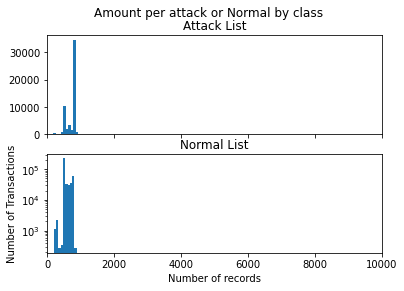

In [23]:
fraud = df1[df1.A == 1]
normal = df1[df1.A == 0]
# Amount vs Class
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per attack or Normal by class')
ax1.hist(fraud.LIT101, bins = 10)
ax1.set_title('Attack List')
ax2.hist(normal.LIT101, bins = 10)
ax2.set_title('Normal List')
plt.xlabel('Number of records')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show() 

In [24]:
# # # drop the target variable 
# df1.drop('A',axis=1,inplace=True)  

In [25]:
df_normal = df1[Normal_mask]
df_attack = df1[Attack_mask] 
print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")  

Normal count: 388150
Attack count: 53648


In [71]:
# df1

In [27]:
# # This is the feature vector that goes to the neural net
# x_good = df_normal.values 
# x_bad = df_attack.values  

x_good = df_normal
x_bad = df_attack


In [28]:
# split the normal data with respect to test and Train 
from sklearn.model_selection import train_test_split 
x_good_train, x_good_test = train_test_split(x_good, test_size=0.25, random_state=42) 
 

In [29]:
# min max scale the input data or Standard Scaler  
x_good_train = x_good_train[x_good_train.A == 0] #where normal transactions 
x_good_train = x_good_train.drop(['A'], axis=1) #drop the class columns 

test_y = x_good_test['A'] #save the class column for the test set 
x_good_test = x_good_test.drop(['A'], axis=1) #drop the class column 

x_good_train = x_good_train.values #transform to ndarray 
x_good_test = x_good_test.values 
x_good_train.shape, x_good_test.shape 




((291112, 25), (97038, 25))

### Build Model 

In [ ]:
######### 
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  

In [72]:
model = Sequential()
model.add(Dense(64, input_dim=x_good_train.shape[1], activation='relu'))
Dropout(0.1), 
model.add(Dense(3, activation='relu'))
Dropout(0.1), 
model.add(Dense(64, activation='relu'))
Dropout(0.1), 
model.add(Dense(x_good_train.shape[1])) 
model.compile(loss='msle',metrics=['accuracy'],optimizer='adam') 
model.summary()  

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                1664      
                                                                 
 dense_37 (Dense)            (None, 3)                 195       
                                                                 
 dense_38 (Dense)            (None, 64)                256       
                                                                 
 dense_39 (Dense)            (None, 25)                1625      
                                                                 
Total params: 3,740
Trainable params: 3,740
Non-trainable params: 0
_________________________________________________________________


In [73]:
#model.fit(x_good_train,x_good_train,verbose=1,epochs=100) 
grid=model.fit(
    x_good_train,x_good_train,
    verbose=1,
    epochs=50,
    batch_size=512,
    validation_data=(x_good_test, x_good_test), 
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])  
score=model.evaluate(x_good_test, x_good_test, verbose=1)
print('Test loss:', score[0]) 
print('accuracy:', score[1])  


Epoch 1/50
569/569 [==============================] - 7s 11ms/step - loss: 9.8158 - accuracy: 0.0059 - val_loss: 8.8014 - val_accuracy: 0.0093
Epoch 2/50
569/569 [==============================] - 6s 11ms/step - loss: 8.7930 - accuracy: 0.0088 - val_loss: 8.7843 - val_accuracy: 0.0093
Epoch 3/50
569/569 [==============================] - 6s 11ms/step - loss: 8.7833 - accuracy: 0.0088 - val_loss: 8.7902 - val_accuracy: 0.0093
Epoch 4/50
569/569 [==============================] - 6s 11ms/step - loss: 8.7846 - accuracy: 0.0088 - val_loss: 8.8508 - val_accuracy: 0.0093
Epoch 5/50
569/569 [==============================] - 6s 11ms/step - loss: 8.7885 - accuracy: 0.0088 - val_loss: 8.7813 - val_accuracy: 0.0093
Epoch 6/50
569/569 [==============================] - 6s 11ms/step - loss: 8.7813 - accuracy: 0.0088 - val_loss: 8.7811 - val_accuracy: 0.0093
Epoch 7/50
569/569 [==============================] - 6s 11ms/step - loss: 8.7832 - accuracy: 0.0088 - val_loss: 8.7810 - val_accuracy: 0.0093

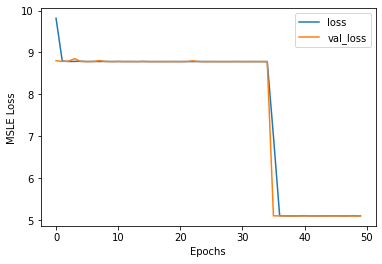

In [74]:
plt.plot(grid.history['loss'])
plt.plot(grid.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()  

In [64]:
test_x_predictions = model.predict(x_good_test,verbose=1)
mse = np.mean(np.power(x_good_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,'True_class': test_y})  
error_df.describe() 
error_df 

3033/3033 [==============================] - 6s 2ms/step


,Reconstruction_error,True_class
141651,78627.232114,0
142537,80109.269758,0
200820,88016.673386,0
182859,78013.232744,0
421278,86800.094488,0
...,...,...
169425,78012.576070,0
27575,80060.905048,0
172768,82356.283879,0
54804,80198.495600,0


In [70]:
## performance measuremnt 
pred = model.predict(x_good_test)
score1 = np.sqrt(metrics.precision_recall_curve(pred,test_y)) 
score1  

In [67]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
LABELS = ["class1","class3"]
threshold_fixed = 4000
pred_y = [1.0 if e > threshold_fixed else 0 for e in 
                                error_df.Reconstruction_error.values]

# conf_matrix = confusion_matrix(error_df.True_class, pred_y)
# plt.figure(figsize=(12, 12))
# sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
# plt.title("Confusion matrix")
# plt.ylabel('True class')
# plt.xlabel('Predicted class')
# plt.show ()    

In [68]:
# print(classification_report(test_y,pred_y))    

In [57]:
# Performance Measurment for the model 
# from sklearn.metrics import accuracy_score 
# #accuracy_score(x_good_test,pred)  

# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
# print('Recall: %.3f' % recall_score(x_good_test, pred)) 
# print('Precision: %.3f' % precision_score(x_good_test, pred)) 
 

In [58]:
# pred2= model.predict(x_good)
# score2 = np.sqrt(metrics.mean_squared_error(pred,x_good)) 

In [59]:
# pred3 = model.predict(x_bad)
# score3 = np.sqrt(metrics.mean_squared_error(pred2,x_bad)) 